## 1차원 데이터

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [4]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [7]:
scores_df = pd.DataFrame({'score':scores},index=list('ABCDEFGHIJ'))
scores_df.head()

,score
A,42
B,69
C,56
D,41
E,57


In [29]:
scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(list('ABCDEFGHIJ'),name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [9]:
# 평균값 - 배열
sum(scores)/len(scores)
np.mean(scores)

55.0

In [10]:
# 평균값 - 데이터프레임
scores_df.mean()

score    55.0
dtype: float64

In [11]:
# 중앙값
np.median(scores)
scores_df.median()

score    56.5
dtype: float64

In [14]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [15]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0+m1) / 2
else:
    median = sorted_scores[(n+1)//2-1]
median    

56.5

In [17]:
# 최빈값
scores_df.mode()

,score
0,65


In [18]:
pd.Series(sorted_scores).mode()

0    65
dtype: int64

In [30]:
scores_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


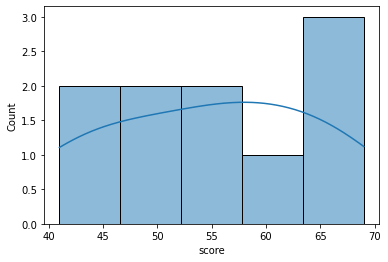

In [31]:
import seaborn as sns
sns.histplot(data=scores_df,x='score',kde=True)

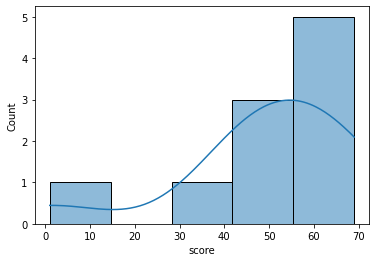

In [32]:
# 평균값 < 중앙값
scores_df_a = scores_df.copy()
scores_df_a.iloc[9,0] = 1
sns.histplot(data=scores_df_a,x='score',kde=True)

In [34]:
scores_df_a.describe()

,score
count,10.000000
mean,49.300000
std,19.556471
min,1.000000
25%,43.500000
50%,52.500000
75%,63.000000
max,69.000000


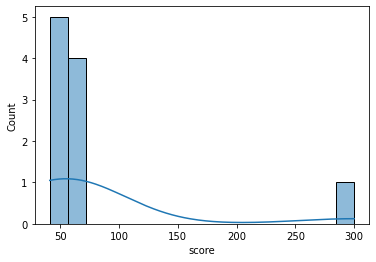

In [33]:
# 평균값 > 중앙값
scores_df_b = scores_df.copy()
scores_df_b.iloc[9,0] = 300
sns.histplot(data=scores_df_b,x='score',kde=True)

In [35]:
scores_df_b.describe()

,score
count,10.000000
mean,79.200000
std,78.187524
min,41.000000
25%,48.250000
50%,56.500000
75%,65.000000
max,300.000000


In [40]:
# 데이터의 산포도 지표
# 분산과 표준편차
# 편차(deviation)
mean = np.mean(scores)
print(mean)
print(scores)
deviation = scores - mean
print(deviation)

55.0
[42 69 56 41 57 48 65 49 65 58]
[-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]


In [42]:
sum(deviation)
np.mean(deviation)

0.0

#### 분산
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산. 
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨
 
[표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [44]:
# 넘파이 - 표본분산
np.mean(deviation ** 2)
np.var(scores)

86.0

In [45]:
# 판다스 - 불편분산
scores_df.var()

score    95.555556
dtype: float64

In [47]:
# 넘파이 - 불편분산
np.var(scores,ddof=1)

95.55555555555556

In [50]:
# 판다스 - 표본분산
scores_df.var(ddof=0)

score    86.0
dtype: float64

In [52]:
# 표준편차
np.sqrt(np.var(scores,ddof=0))
np.std(scores, ddof=0)

9.273618495495704

In [53]:
# 범위와 4분위수
# 범위
np.max(scores) - np.min(scores)

28

In [54]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [55]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [57]:
# 데이터의 정규화
print(scores)
print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

[42 69 56 41 57 48 65 49 65 58]
평균: 55.0, 표준편차: 9.2736


In [58]:
# 표준화
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [59]:
55.0 + z*scores.std()

array([42., 69., 56., 41., 57., 48., 65., 49., 65., 58.])

In [60]:
# 데이터의 시각화
english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [61]:
# 도수분포표
freq,_=np.histogram(english_scores,bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [63]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class,name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [67]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [73]:
# 상대도수 : 해당 계급 데이터의 상대적인 비율
rel_freq = freq /freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [74]:
# 누적 상대도수 : 해당 계급까지의 상대도수의 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [79]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative_frequency'] = rel_freq
freq_dist_df['cumulative_frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class_value','frequency','relative_frequency','cumulative_frequency']]
freq_dist_df

,class_value,frequency,relative_frequency,cumulative_frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [80]:
# 최빈값
freq_dist_df.loc[freq_dist_df.frequency.idxmax(),'class_value']

65

(array([ 0.,  0.,  0.,  2.,  8., 16., 18.,  6.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

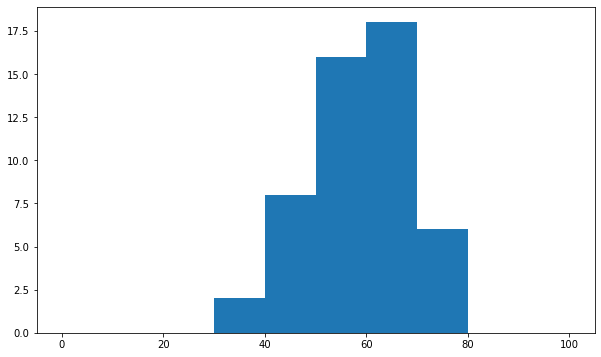

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(english_scores,bins=10,range=(0,100))

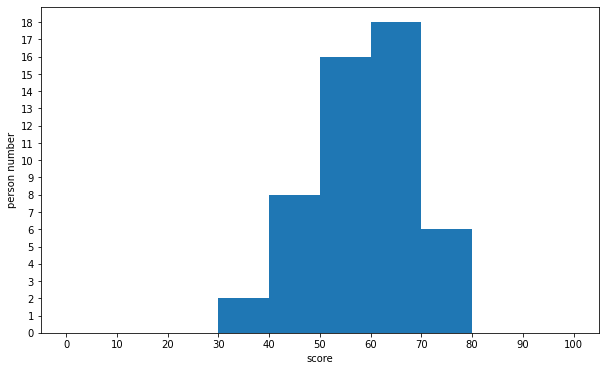

In [87]:
# 히스토그램 : 도수분포표를 막대그래프로 표현
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

freq, _, _ = plt.hist(english_scores,bins=10,range=(0,100))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0,100,10+1))
plt.yticks(np.arange(0,freq.max()+1))

plt.show()

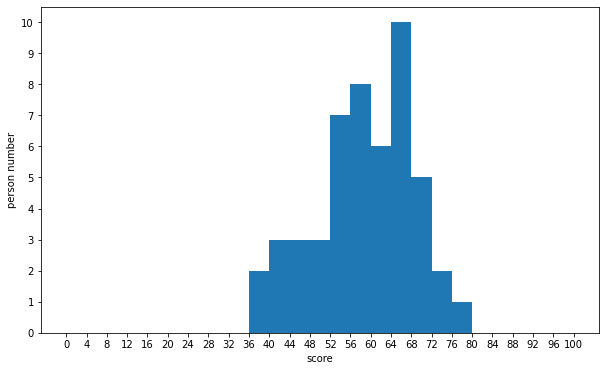

In [115]:
plt.figure(figsize=(10,6))

freq, _, _ = plt.hist(english_scores,bins=25,range=(0,100))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0,100,25+1))
plt.yticks(np.arange(0,freq.max()+1))
plt.show()

#### 과제1.
아래 상대도수를 나타내는 히스토그램에 추가하여 누적 상대도수(y축 왼쪽)를 꺽은선 그래프로 표현하세요.

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.06 0.06 0.06 0.14
 0.16 0.12 0.2  0.1  0.04 0.02 0.   0.   0.   0.   0.  ]


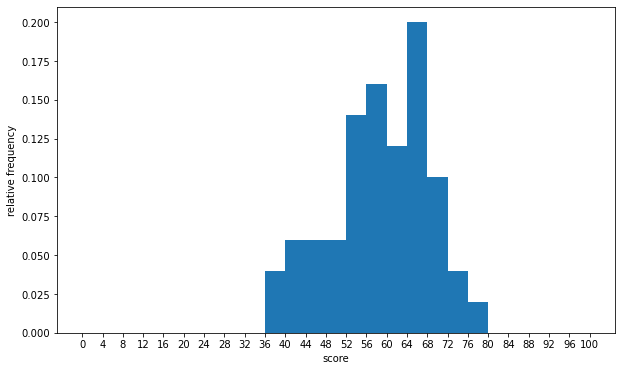

In [119]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)
print(rel_freq)
ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))
plt.show()

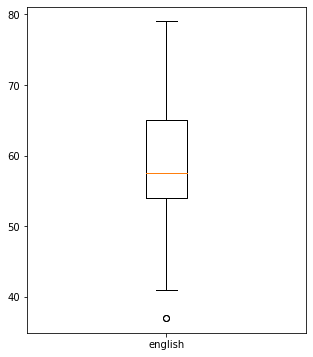

In [94]:
# box plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(5,6))
plt.boxplot(english_scores,labels=['english'])
plt.show()

In [95]:
english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

#### 과제2.

타이타닉 데이터셋에서 age, pclass, fare, sex, embarked 컬럼 중 2개를 선택하여 각 컬럼의 특징을 설명하고 종속변수인 survived와의 관계를 기술하세요.
- 각 컬럼에 대한 전처리 후 기초 통계량, 시각화를 통한 분포 및 특징 탐색, 이상치 여부 탐색
- 선택한 컬럼을 가장 잘 활용할 수 있는 형태로 변환

## 2차원 데이터

In [97]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [98]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                         'mathematics':ma_scores},
                        index=pd.Index(list('ABCDEFGHIJ'),name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [101]:
# 공분산 : 두 변수가 함께 변화하는 경향을 나타내는 통계적 척도
# 공분산이 양수인 경우 한 변수가 증가할 때 다른 변수도 증가하는 경향이 있으며, 
# 음수인 경우 한 변수가 증가할 때 다른 변수는 감소하는 경향이 있습니다. 
# 공분산이 0에 가까운 경우 두 변수 사이에는 거의 상관관계가 없다고 볼 수 있습니다.
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df.english - summary_df.english.mean()
summary_df['mathematics_deviation'] = summary_df.mathematics - summary_df.mathematics.mean()
summary_df['product of deviation'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [107]:
print(np.var(scores_df.english))
print(np.var(scores_df.mathematics))

86.0
68.44000000000001


In [103]:
summary_df['product of deviation'].mean()

62.8

In [106]:
# np.cov(en_scores,ma_scores,ddof=1)
np.cov(en_scores,ma_scores,ddof=0)

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [109]:
# n-1로 나눔
np.cov(en_scores,ma_scores, ddof=1) # default

array([[95.55555556, 69.77777778],
       [69.77777778, 76.04444444]])

In [111]:
# 상관계수
np.cov(en_scores,ma_scores,ddof=0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [112]:
np.corrcoef(en_scores,ma_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [113]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


#### 과제3.
타이타닉 데이터셋에서 age, pclass, fare, sex, embarked 컬럼 중 2개의 쌍을 선택하여 공분산 행렬및 상관계수 행렬을 각각 구하여 비교하세요. 
